# Laboratorio 4: Spark y EDA 🐼

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristóbal Jara C.
- Nombre de alumno 2: Cristóbal Quilodrán M.


### **Link de repositorio de GitHub:** `https://github.com/T0bal26/Laboratorios`

### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

## Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

1.- Apache Spark es una herramienta para procesar datos a gran escala de forma rápida. Es más rápido que Pandas porque puede distribuir el trabajo en múltiples computadoras.

2.- Un RDD (Resilient Distributed Dataset) en Spark es una colección de elementos distribuida en múltiples nodos de un clúster. Una característica importante es que los RDD son inmutables. Los dataframes en Spark se construyen sobre los RDD y proporcionan una estructura más organizada para trabajar con datos.

3.- En Spark, las transformaciones son operaciones que transforman un RDD en otro, como filtrar o mapear datos. Las acciones, por otro lado, realizan cálculos y devuelven resultados, como contar o recolectar datos. Cuando se ejecuta una acción, Spark planifica y optimiza las transformaciones necesarias para calcular el resultado.

4.- El particionamiento en Spark es importante porque determina cómo se distribuyen los datos en el clúster para el procesamiento paralelo. Un buen particionamiento puede mejorar el rendimiento al minimizar la transferencia de datos entre nodos y permitir un procesamiento más eficiente.

5.- El Spark Driver es responsable de coordinar los trabajos Spark en un clúster, mientras que los Spark Executors son responsables de ejecutar las tareas individuales en los nodos del clúster.

6.- El Catalyst Optimizer es un componente de Spark que optimiza consultas SQL. Analiza y reorganiza las consultas para mejorar el rendimiento, como la eliminación de código redundante y la reorganización de operaciones para minimizar el tiempo de ejecución.


## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [40]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [41]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

Cargue los datos usando **pyspark**

In [42]:
# Escriba su respuesta aquí

sparksession = SparkSession.builder.master("local").appName("Lab-4").getOrCreate()
sparksession

In [43]:
%%capture
!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet

!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

In [44]:
df = (
    sparksession.read
    .option("header",'True')
    #.option('delimiter', ',') # Formato del delimiter en el archivo de lectura
    .parquet("datos_lab_spark.parquet")

)

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [45]:
# 1.   Utilice `.printSchema()` para revisar la estructura de los datos
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [46]:
#2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
df.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [47]:
#3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
df.sample(fraction=0.05, seed=420).show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|                NULL|                NULL|             16.05|2022-11-04 00:00:00|   credit card|   home & garden|     3.0|        22.0|       West Kevin|     mobile|           NULL|1832 

In [48]:
#4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
df.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

```
Las columnas con tipo inadecuado son las de 'Quantity', 'Customer Age', 'Is an Alien', 'Account age days', y 'Transaction hour'. Que deberían ser int, int, bool, int e int respectivamente.
```

In [49]:
#5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.

#Usamos el formato visto en clase para cambiar el tipo a varias columnas
from pyspark.sql.types import IntegerType, BooleanType

def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.
    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.
    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df

# Ejemplo de uso
cols_to_cast = {"Quantity": IntegerType(), "Customer Age": IntegerType(), "Is An Alien": BooleanType(), "Account Age Days": IntegerType(), "Transaction Hour": IntegerType()}
df_2 = cast_columns(df, cols_to_cast)
df_2.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: boolean (nullable = true)
 |-- Account Age Days: integer (nullable = true)
 |-- Transaction Hour: integer (nullable = true)



In [50]:
#6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
from pyspark.sql.functions import when, rand, col, sum
exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df_2.columns]

df_2.agg(*exprs).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

In [51]:
#7. Elimine datos nulos.
df_2 = df_2.dropna()

In [52]:
#8. Elimine datos duplicados.
df_2 = df_2.dropDuplicates()

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 5 productos o menos.
  * Compra mayorista: 6 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [53]:
from pyspark.sql.functions import col, log, month

#1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
df_2 = df_2.withColumn("Transaction bp", log(48 + col("Transaction Amount") ** 36))

In [54]:
#2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
df_2 = df_2.withColumn("Transaction Month", month(col("Transaction Date")))

In [55]:
#3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
#  * Compra minorista: 5 productos o menos.
#  * Compra mayorista: 6 produtos o más.
df_2 = df_2.withColumn("Type of purchase", when(col("Quantity") <= 5, "Compra minorista").otherwise("Compra mayorista"))

In [56]:
#4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
registro_alien = df_2.filter((col("Is An Alien") == True) & (col("Type of purchase") == "Compra mayorista"))
registro_alien.show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|Transaction bp|Transaction Month|Type of purchase|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+---------------

```
Al parecer los alien no realizan compras mayoristas.
```

In [57]:
#5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
compras_por_tipo = df_2.groupBy("Is An Alien").count()
compras_por_tipo.show()

+-----------+-----+
|Is An Alien|count|
+-----------+-----+
|       true|  688|
|      false|12700|
+-----------+-----+



In [58]:
#6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.
tabla_recaudación = df_2.groupBy("Payment Method").pivot("Is An Alien").avg("Transaction Amount")
tabla_recaudación.show()

+--------------+------------------+------------------+
|Payment Method|             false|              true|
+--------------+------------------+------------------+
|    debit card|215.21641883519203| 547.1965168539324|
| bank transfer|215.15149230285903| 547.6004624277458|
|        PayPal|215.12598584753908|469.51776470588214|
|   credit card|206.31122327044054| 517.7530538922155|
+--------------+------------------+------------------+



### 4. EDA [18 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas**: Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas**:
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas**:
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones**:
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

Visualización de Variables Categoricas:

In [59]:
#1. Conversión del DataFrame a formato pandas
df_2_pd = df_2.toPandas()

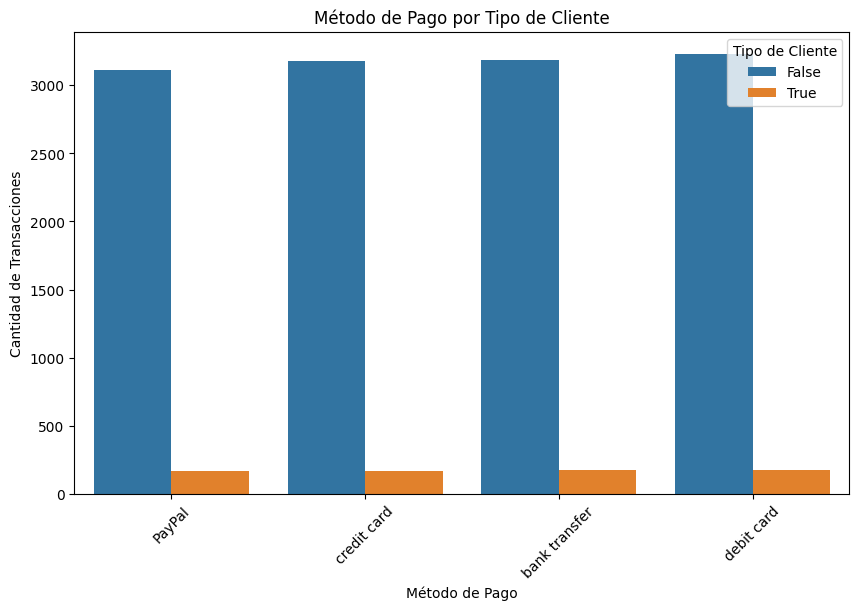

In [60]:
#2. Visualización de Variables Categóricas diferenciando entre humanos y aliens
import seaborn as sns

# Gráfico de barras para Payment Method diferenciando entre humanos y aliens
plt.figure(figsize=(10, 6))
sns.countplot(data=df_2_pd, x='Payment Method', hue='Is An Alien')
plt.title('Método de Pago por Tipo de Cliente')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Tipo de Cliente')
plt.xticks(rotation=45)
plt.show()

Podemos ver en primer lugar que siempre para cada uno de los métodos de pago el ser Alien siempre tiene menores cantidades en las transacciones que el ser humano, de igual manera, al ser Alien se tiene que  la cantidad de transacciones no llega a pasar las 500 para cada método de pagos, en cambio, el ser humano pasa la cantidad de 3000 transacciones para cada uno de los métodos de pago

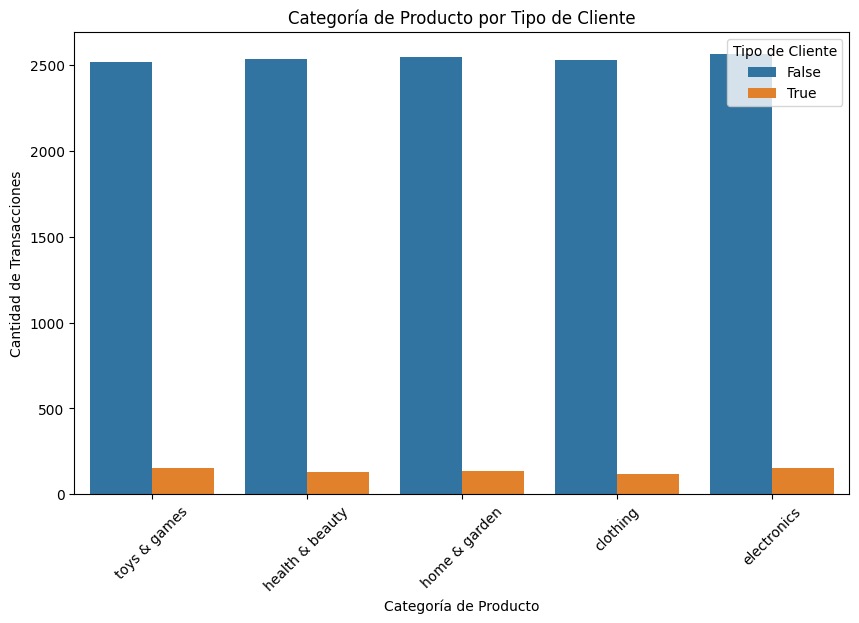

In [61]:
# Gráfico de barras para Product Category diferenciando entre humanos y aliens
plt.figure(figsize=(10, 6))
sns.countplot(data=df_2_pd, x='Product Category', hue='Is An Alien')
plt.title('Categoría de Producto por Tipo de Cliente')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Tipo de Cliente')
plt.xticks(rotation=45)
plt.show()

Aquí pasa algo similar que en el gráfico anterior, se tienen que para cada uno de las categorías de productos no pasa las 500 transacciones cuando se es Alien, se puede observar de igual manera un comportamiento similar para los humanos y Aliens en que cada una de las categorías tiene un balance en la cantidad de transacciones y no hay alguna categoria que tenga más cantidades de transacciones que otros.

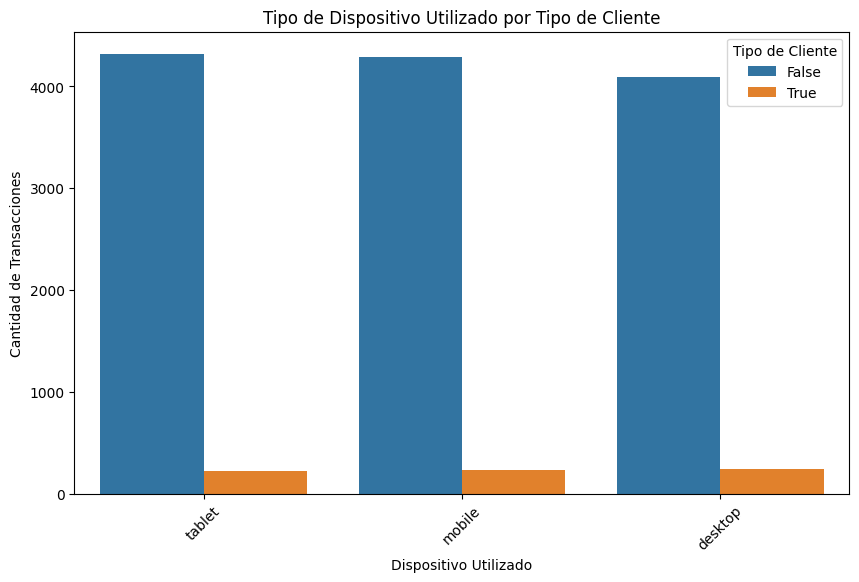

In [62]:
# Gráfico de barras para Device Used diferenciando entre humanos y aliens
plt.figure(figsize=(10, 6))
sns.countplot(data=df_2_pd, x='Device Used', hue='Is An Alien')
plt.title('Tipo de Dispositivo Utilizado por Tipo de Cliente')
plt.xlabel('Dispositivo Utilizado')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Tipo de Cliente')
plt.xticks(rotation=45)
plt.show()


Aquí se puede observar que también se observa un comportamiento similar que los dos gráficos anteriores, se tiene que cuando uno es Alien el dispositivo utilizado respecto a la cantidad de transacciones no supera los 1000, en cambio, cuando un es humano esta cantidad supera las 4000 para todos los tipos de dispositivos, no obstante, se tiene que el computador se ocupa un poco menos que los celulares y tablets.

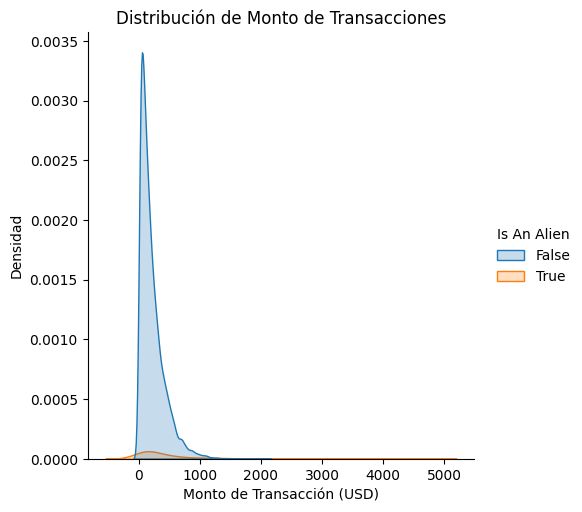

In [63]:
#3. Visualización de Variables Numéricas diferenciando entre humanos y aliens
# Distplot para Transaction Amount diferenciando entre humanos y aliens
sns.displot(df_2_pd, x='Transaction Amount', hue='Is An Alien', kind='kde', fill=True)
plt.title('Distribución de Monto de Transacciones')
plt.xlabel('Monto de Transacción (USD)')
plt.ylabel('Densidad')
plt.show()

Cuando uno es Alien se tiene que el monto de la transacción se encuentra a la derecha de los 0 dolares pero lejano a los 1000 dolares, no obstante, la curva sigue una pequeña densidad hasta los 5000 cosa que para los seres humanos este se corta pasando los 2000 dolares y la gran mayoría de sus montos de transacción se encuentran entre los 0 y 1500 dolares aproximadamente, y para los aliens este monto va desde los 0 a 1000 dolares aproximadamente.

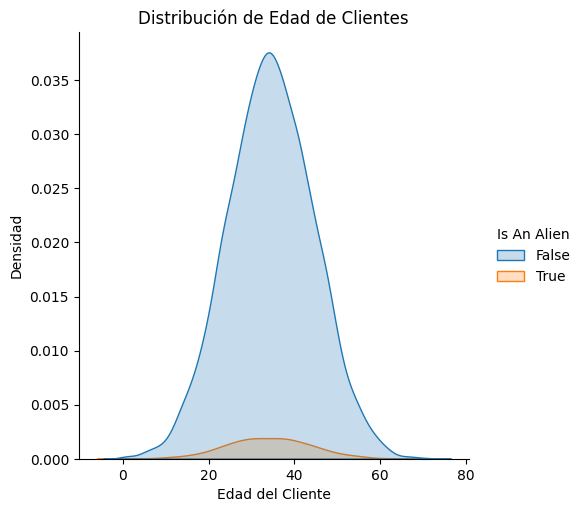

In [64]:
# Distplot para Customer Age diferenciando entre humanos y aliens
sns.displot(df_2_pd, x='Customer Age', hue='Is An Alien', kind='kde', fill=True)
plt.title('Distribución de Edad de Clientes')
plt.xlabel('Edad del Cliente')
plt.ylabel('Densidad')
plt.show()

Aquí se puede observar que en ambos casos se tiene un comportamiento gaussiano, y que además la media de las edades esta cercana a los 40 años, lo que si difieren es que cuando se es alien las edades están entre cerca de los 20 a los 60, pero cuando no se es alien esta edad va desde casi los 0 años hasta pasado los 60 años.

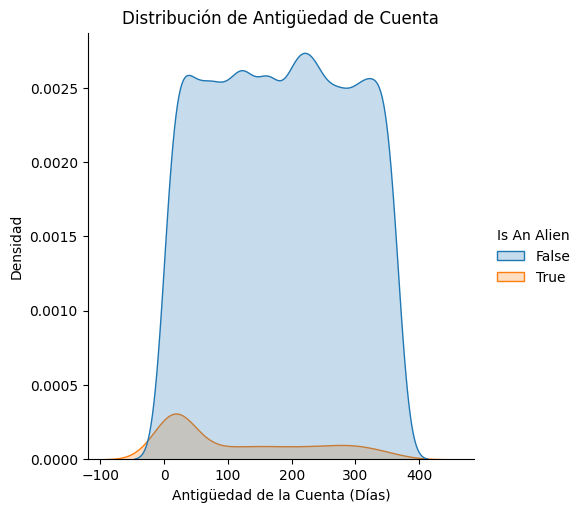

In [65]:
# Distplot para Account Age Days diferenciando entre humanos y aliens
sns.displot(df_2_pd, x='Account Age Days', hue='Is An Alien', kind='kde', fill=True)
plt.title('Distribución de Antigüedad de Cuenta')
plt.xlabel('Antigüedad de la Cuenta (Días)')
plt.ylabel('Densidad')
plt.show()

Aquí se puede observar que para ambos casos hay días negativos los cuales pueden ser outliers o datos mal procesados, lo que si se puede observar es que cuando se es alien los datos de la antiguedad de la cuenta están más carcanos a cero, pero cuando no se es alien no se puede encontrar un día cercano en donde se acumulen, es más un comportamiento normal.

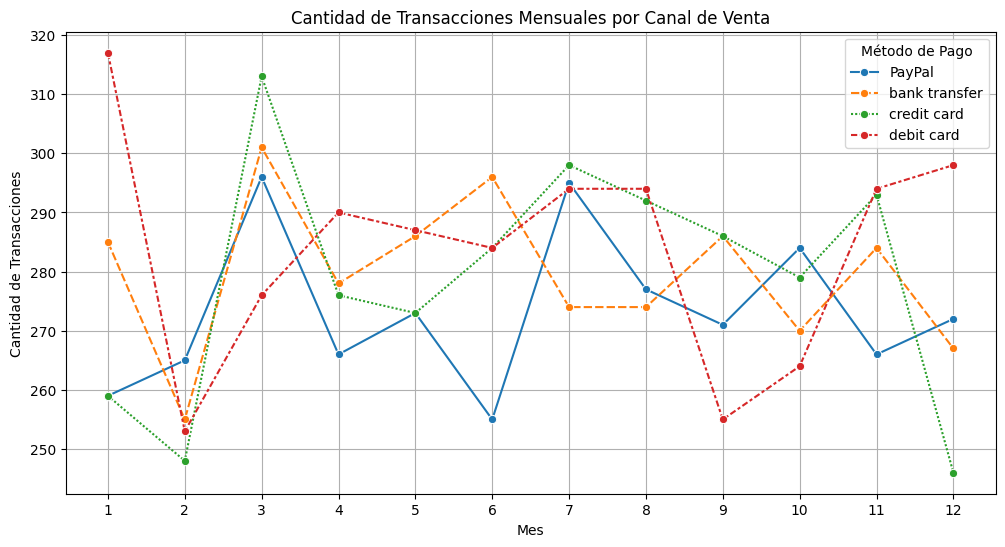

In [66]:
#4.- Análisis de Patrones en Transacciones
#la cantidad de transacciones mensuales por canal de venta
transacciones_mensuales = df_2_pd.groupby(['Transaction Month', 'Payment Method']).size().unstack()

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(data=transacciones_mensuales, marker='o')
plt.title('Cantidad de Transacciones Mensuales por Canal de Venta')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Método de Pago')
plt.xticks(transacciones_mensuales.index)
plt.grid(True)
plt.show()


Para esté gráfico se puede observar que en general ninguno de los métodos de pago siguio un patron de comportamiento o mantuvo regular su cantidad de transacciones, lo que si se puede observar es que para el mes dos hubo una disminución en las transacciones para tres métodos de pago excepto para Paypal, quien aumento un poco su cantidad mensual de compras y para luego el mes tres que los 4 canales de pago aumentaron considerablemente su cantidad de transacciones, oscilando en los meses siguiente entre las 250 y 300 transacciones por método de pago.

<Figure size 1200x600 with 0 Axes>

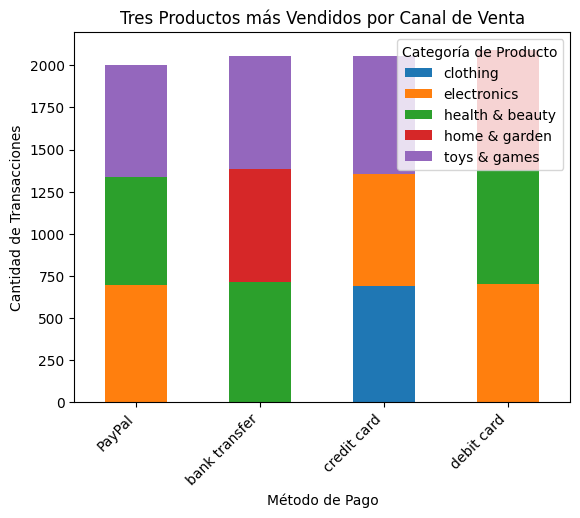

In [67]:
# Tres productos más vendidos por canal de venta
top_products_by_payment_method = df_2_pd.groupby(['Payment Method', 'Product Category']).size().groupby(level=0, group_keys=False).nlargest(3)

# Graficar
plt.figure(figsize=(12, 6))
top_products_by_payment_method.unstack().plot(kind='bar', stacked=True)
plt.title('Tres Productos más Vendidos por Canal de Venta')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Categoría de Producto')
plt.xticks(rotation=45, ha='right')
plt.show()


Se puede apreciar del gráfico que tanto los productos electronicos, de belleza y juguetes tienen una predominancia respecto a los métodos de pago ya que, están en 3 de los 4 métodos, por otro lado, lo que es ropa solo aparece para el método de tarjetas de crédito.

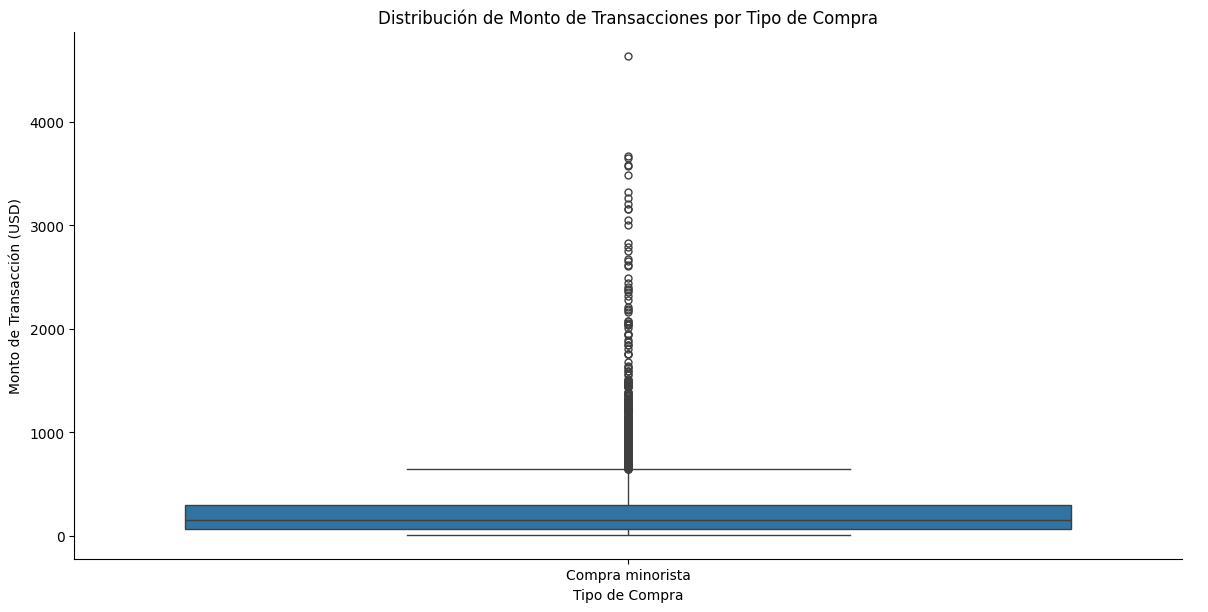

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar utilizando catplot (caja y bigotes) para cada tipo de compra
sns.catplot(data=df_2_pd, x='Type of purchase', y='Transaction Amount', kind='box', height=6, aspect=2)
plt.title('Distribución de Monto de Transacciones por Tipo de Compra')
plt.xlabel('Tipo de Compra')
plt.ylabel('Monto de Transacción (USD)')
plt.show()


Dado que solo hay tipos de compra minorista, es decir que compran a los más 5 productos, se tiene que para el 75% de los datos la cantidad de dolares por transacción esta hasta los 1000 dolares, se puede observar que hay muchos outliers que pueden al momento de querer ver mediciones alterar los resultados.

### 5. Particiones y consultas en SQL [6 puntos]
(2 puntos por pregunta)

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark**:
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes**:
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark**:
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [69]:
# DataFrame previamente transformado (asumiendo que df_transformado es el DataFrame resultante)
# Reemplaza df_transformado con el nombre real de tu DataFrame
df_2.createOrReplaceTempView("transacciones")

Se escogerá la variable Customer ID, ya que a partir de esta facilitará la realización de consultas eficientes basadas en este campo. Además el ID al ser único por cliente nos puede ayudar para conocer acerca de cada cliente.

In [70]:
# Crear tabla SQL particionada por Customer ID
sparksession.sql("""
    CREATE TABLE IF NOT EXISTS transacciones_sql
    USING parquet
    PARTITIONED BY (`Customer ID`)
    AS SELECT * FROM transacciones
""")


DataFrame[]

In [79]:
top_10_clientes = sparksession.sql("""
    SELECT `Customer ID`, SUM(`Quantity`) AS Total_Productos_Comprados
    FROM transacciones
    GROUP BY (`Customer ID`)
    ORDER BY Total_Productos_Comprados DESC
    LIMIT 10
""")

# Mostrar el resultado
top_10_clientes.show()

+--------------------+-------------------------+
|         Customer ID|Total_Productos_Comprados|
+--------------------+-------------------------+
|6def79d9-fb71-415...|                        5|
|abc58f3b-387c-455...|                        5|
|2f3d5b31-bd85-4d7...|                        5|
|ddfbe502-d51c-4ac...|                        5|
|aa8c72f5-fbcc-4bf...|                        5|
|ebf10b43-2999-4fa...|                        5|
|866e29ec-dd8e-4a1...|                        5|
|6300f942-b86d-433...|                        5|
|e91ebafd-1925-400...|                        5|
|a76f00f5-8493-41b...|                        5|
+--------------------+-------------------------+



In [84]:
from pyspark.sql import Window
from pyspark.sql.functions import max, col, current_date, expr, row_number

# Definir ventana de tres meses
ventana = Window.partitionBy("Customer ID").orderBy(col("Transaction Date").desc())

# Filtrar transacciones de los últimos tres meses
transacciones_ultimos_3_meses = df_2.filter(df_2["Transaction Date"] >= (current_date() - expr("INTERVAL 3 MONTH")))

# Calcular la compra más alta realizada por cada usuario en los últimos tres meses utilizando SQL
resultado_sql = transacciones_ultimos_3_meses \
    .selectExpr("*", "ROW_NUMBER() OVER (PARTITION BY `Customer ID` ORDER BY `Transaction Date` DESC) AS rn") \
    .where(col("rn") == 1) \
    .groupBy("Customer ID") \
    .agg(max("Transaction Amount").alias("maximo de compras últimos 3 meses"))

# Mostrar el resultado
resultado_sql.show()

+--------------------+---------------------------------+
|         Customer ID|maximo de compras últimos 3 meses|
+--------------------+---------------------------------+
|0010bfa7-d3b5-442...|                           130.74|
|004d6df5-5d37-4cd...|                            32.36|
|0061c7c7-ffd9-40d...|                           255.97|
|0084aeb6-6bc7-4f8...|                           265.09|
|00dba4f3-102b-4d8...|                            80.76|
|00dcef31-265c-4d3...|                            82.57|
|011ba8d6-6dcd-4cf...|                           218.64|
|014817a0-2f4f-477...|                           289.72|
|014da57c-a59c-465...|                            33.22|
|015a8996-8ac2-488...|                           451.94|
|01754c8a-c873-49e...|                           267.89|
|0178fe5b-e055-4ec...|                           723.04|
|01ac1427-4acc-410...|                           234.43|
|01feca2f-2907-445...|                            48.71|
|0270d1d5-c8b8-4be...|         

### 6. UDF [10 puntos]
(2 por pregunta)

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función.
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad.
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito.
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado.
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

In [85]:
# Código Aquí
import pickle
import requests
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# 1. Cargamos el objeto serializado
url = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false"
response = requests.get(url)
serialized_object = pickle.loads(response.content)

In [86]:
# 2. Explorar el objeto
dir(serialized_object)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_

In [87]:
help(serialized_object.predict_proba)

Help on method predict_proba in module sklearn.linear_model._logistic:

predict_proba(X) method of sklearn.linear_model._logistic.LogisticRegression instance
    Probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    For a multi_class problem, if multi_class is set to be "multinomial"
    the softmax function is used to find the predicted probability of
    each class.
    Else use a one-vs-rest approach, i.e calculate the probability
    of each class assuming it to be positive using the logistic function.
    and normalize these values across all the classes.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Vector to be scored, where `n_samples` is the number of samples and
        `n_features` is the number of features.
    
    Returns
    -------
    T : array-like of shape (n_samples, n_classes)
        Returns the probability of the sample for each class in the model,


In [88]:
# 3. Crea una función personalizada
def predict_fraud_probability(transaction_amount, quantity, customer_age, transaction_hour):
    probability = serialized_object.predict_proba([[transaction_amount, quantity, customer_age, transaction_hour]])[0][-1]
    return probability

In [89]:
# 4. Definir la función UDF
# Definir la función UDF
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# Define la función predict_fraud_probability
def predict_fraud_probability(transaction_amount, quantity, customer_age, transaction_hour):
    probability = serialized_object.predict_proba([[transaction_amount, quantity, customer_age, transaction_hour]])[0][-1]
    return probability

# Crea la UDF utilizando la función predict_fraud_probability
fraud_probability_udf = udf(predict_fraud_probability, FloatType())

In [ ]:
# 5. Generar una nueva columna
df_with_prediction = df_2.withColumn("prediction", fraud_probability_udf("Transaction Amount", "Quantity", "Customer Age", "Transaction Hour"))

# Mostrar un ejemplo de cómo se aplica la función UDF
df_with_prediction.show(5)